1. 标准化数据集

In [5]:
# %load ./utils/sample-wine.py
import pandas as pd
import numpy as np

df_wine = pd.read_csv('./data/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Class labels [1 2 3]


2. 构建协方差矩阵
3. 得到协方差矩阵的特征值和特征向量

In [11]:
cov_mat = np.cov(X_train_std.T) # 计算数据的协方差矩阵
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # 特征值分解
print('\nEigenvalues \n%s' % eigen_vals)
eigen_vecs.shape


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


(13, 13)

特征值$\lambda_j$的方差解释比：$$\frac{\lambda_j}{\sum^d_{j=1}\lambda_j}$$

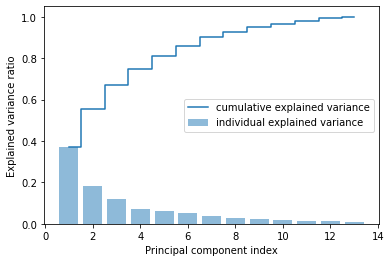

In [12]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance') # 独立的解释方差
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance') # 累计的解释方差
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()